In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from PIL import Image
import time
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pdb
from sklearn.preprocessing import OneHotEncoder
from IPython.display import clear_output

In [2]:
img = cv2.imread('example_0.JPG')

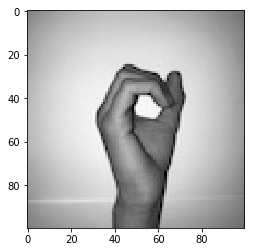

In [3]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')

In [4]:
data = []
label = []

In [5]:
for i in range(10):
    for filename in os.listdir(os.path.join(os.getcwd(), 'Dataset/' + str(i))):
            img = cv2.imread(os.path.join(os.getcwd(), 'Dataset/' + os.path.join(str(i), filename)))
            gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            data.append(gray_img)
            label.append(i)

In [6]:
data = np.array(data)
data = data.reshape(len(data), 100, 100, 1)
data = data/255

In [7]:
label = np.array(label)
label = label.reshape(len(label), 1)
enc = OneHotEncoder(sparse=False)
label = enc.fit_transform(label)

/home/harsha/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [8]:
data_shuffle, label_shuffe = shuffle(data, label)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_shuffle, label_shuffe, train_size=0.8, random_state=10)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=5)

/home/harsha/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=4, activation='relu', input_shape=(100,100,1)))
model.add(Dropout(0.2))
# model.add(MaxPooling2D(pool_size=4))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=4, activation='relu'))
model.add(Dropout(0.2))
# model.add(MaxPooling2D(pool_size=4))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=4, activation='relu'))
model.add(Dropout(0.2))
# model.add(MaxPooling2D(pool_size=4))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 97, 97, 32)        544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 45, 45, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 128)       131200    
__________

In [12]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [13]:
from keras.callbacks import ModelCheckpoint  

epochs = 300
history = model.fit(X_train, y_train, 
          validation_data=(X_val, y_val),
          epochs=epochs, batch_size=64, verbose=1)

Train on 1647 samples, validate on 206 samples
Epoch 1/300
1647/1647 [==============================] - 2s 1ms/step - loss: 2.3058 - acc: 0.1081 - val_loss: 2.2915 - val_acc: 0.1165
Epoch 2/300
1647/1647 [==============================] - 1s 483us/step - loss: 2.2056 - acc: 0.2180 - val_loss: 2.1081 - val_acc: 0.3010
Epoch 3/300
1647/1647 [==============================] - 1s 481us/step - loss: 1.6856 - acc: 0.4991 - val_loss: 1.1508 - val_acc: 0.6359
Epoch 4/300
1647/1647 [==============================] - 1s 481us/step - loss: 0.7434 - acc: 0.7541 - val_loss: 0.8301 - val_acc: 0.7379
Epoch 5/300
1647/1647 [==============================] - 1s 475us/step - loss: 0.4658 - acc: 0.8434 - val_loss: 0.6298 - val_acc: 0.8010
Epoch 6/300
1647/1647 [==============================] - 1s 452us/step - loss: 0.3040 - acc: 0.9114 - val_loss: 0.5358 - val_acc: 0.8204
Epoch 7/300
1647/1647 [==============================] - 1s 497us/step - loss: 0.1796 - acc: 0.9508 - val_loss: 0.4431 - val_acc: 0.8

Epoch 59/300
1647/1647 [==============================] - 1s 477us/step - loss: 1.4133e-04 - acc: 1.0000 - val_loss: 0.3249 - val_acc: 0.9029
Epoch 60/300
1647/1647 [==============================] - 1s 486us/step - loss: 1.1799e-04 - acc: 1.0000 - val_loss: 0.3280 - val_acc: 0.9029
Epoch 61/300
1647/1647 [==============================] - 1s 487us/step - loss: 9.8837e-05 - acc: 1.0000 - val_loss: 0.3274 - val_acc: 0.9029
Epoch 62/300
1647/1647 [==============================] - 1s 466us/step - loss: 9.8761e-05 - acc: 1.0000 - val_loss: 0.3270 - val_acc: 0.9029
Epoch 63/300
1647/1647 [==============================] - 1s 474us/step - loss: 9.5339e-05 - acc: 1.0000 - val_loss: 0.3289 - val_acc: 0.9029
Epoch 64/300
1647/1647 [==============================] - 1s 476us/step - loss: 1.2718e-04 - acc: 1.0000 - val_loss: 0.3293 - val_acc: 0.8981
Epoch 65/300
1647/1647 [==============================] - 1s 470us/step - loss: 1.1590e-04 - acc: 1.0000 - val_loss: 0.3275 - val_acc: 0.8981
Epoch 

1647/1647 [==============================] - 1s 523us/step - loss: 5.3131e-05 - acc: 1.0000 - val_loss: 0.3414 - val_acc: 0.9029
Epoch 117/300
1647/1647 [==============================] - 1s 530us/step - loss: 4.8430e-05 - acc: 1.0000 - val_loss: 0.3415 - val_acc: 0.9029
Epoch 118/300
1647/1647 [==============================] - 1s 504us/step - loss: 4.5472e-05 - acc: 1.0000 - val_loss: 0.3424 - val_acc: 0.9029
Epoch 119/300
1647/1647 [==============================] - 1s 450us/step - loss: 4.4490e-05 - acc: 1.0000 - val_loss: 0.3420 - val_acc: 0.9029
Epoch 120/300
1647/1647 [==============================] - 1s 455us/step - loss: 5.2484e-05 - acc: 1.0000 - val_loss: 0.3432 - val_acc: 0.9078
Epoch 121/300
1647/1647 [==============================] - 1s 465us/step - loss: 5.1646e-05 - acc: 1.0000 - val_loss: 0.3434 - val_acc: 0.9029
Epoch 122/300
1647/1647 [==============================] - 1s 486us/step - loss: 4.6807e-05 - acc: 1.0000 - val_loss: 0.3414 - val_acc: 0.9078
Epoch 123/300

1647/1647 [==============================] - 1s 498us/step - loss: 3.5827e-05 - acc: 1.0000 - val_loss: 0.3484 - val_acc: 0.9078
Epoch 174/300
1647/1647 [==============================] - 1s 489us/step - loss: 2.9660e-05 - acc: 1.0000 - val_loss: 0.3483 - val_acc: 0.9078
Epoch 175/300
1647/1647 [==============================] - 1s 524us/step - loss: 3.6628e-05 - acc: 1.0000 - val_loss: 0.3492 - val_acc: 0.9126
Epoch 176/300
1647/1647 [==============================] - 1s 496us/step - loss: 2.8681e-05 - acc: 1.0000 - val_loss: 0.3487 - val_acc: 0.9126
Epoch 177/300
1647/1647 [==============================] - 1s 495us/step - loss: 2.8706e-05 - acc: 1.0000 - val_loss: 0.3490 - val_acc: 0.9126
Epoch 178/300
1647/1647 [==============================] - 1s 510us/step - loss: 2.9595e-05 - acc: 1.0000 - val_loss: 0.3496 - val_acc: 0.9126
Epoch 179/300
1647/1647 [==============================] - 1s 530us/step - loss: 3.2444e-05 - acc: 1.0000 - val_loss: 0.3491 - val_acc: 0.9126
Epoch 180/300

1647/1647 [==============================] - 1s 483us/step - loss: 2.3020e-05 - acc: 1.0000 - val_loss: 0.3559 - val_acc: 0.9078
Epoch 231/300
1647/1647 [==============================] - 1s 513us/step - loss: 2.2642e-05 - acc: 1.0000 - val_loss: 0.3570 - val_acc: 0.9078
Epoch 232/300
1647/1647 [==============================] - 1s 478us/step - loss: 2.1240e-05 - acc: 1.0000 - val_loss: 0.3574 - val_acc: 0.9078
Epoch 233/300
1647/1647 [==============================] - 1s 483us/step - loss: 2.3552e-05 - acc: 1.0000 - val_loss: 0.3581 - val_acc: 0.9029
Epoch 234/300
1647/1647 [==============================] - 1s 544us/step - loss: 1.8340e-05 - acc: 1.0000 - val_loss: 0.3581 - val_acc: 0.9029
Epoch 235/300
1647/1647 [==============================] - 1s 493us/step - loss: 2.1282e-05 - acc: 1.0000 - val_loss: 0.3578 - val_acc: 0.9029
Epoch 236/300
1647/1647 [==============================] - 1s 503us/step - loss: 2.0972e-05 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9029
Epoch 237/300

1647/1647 [==============================] - 1s 506us/step - loss: 1.7765e-05 - acc: 1.0000 - val_loss: 0.3649 - val_acc: 0.9029
Epoch 288/300
1647/1647 [==============================] - 1s 518us/step - loss: 1.6962e-05 - acc: 1.0000 - val_loss: 0.3647 - val_acc: 0.9029
Epoch 289/300
1647/1647 [==============================] - 1s 497us/step - loss: 1.7311e-05 - acc: 1.0000 - val_loss: 0.3639 - val_acc: 0.9078
Epoch 290/300
1647/1647 [==============================] - 1s 517us/step - loss: 1.6938e-05 - acc: 1.0000 - val_loss: 0.3640 - val_acc: 0.9078
Epoch 291/300
1647/1647 [==============================] - 1s 530us/step - loss: 1.6569e-05 - acc: 1.0000 - val_loss: 0.3627 - val_acc: 0.9078
Epoch 292/300
1647/1647 [==============================] - 1s 486us/step - loss: 1.6050e-05 - acc: 1.0000 - val_loss: 0.3630 - val_acc: 0.9029
Epoch 293/300
1647/1647 [==============================] - 1s 516us/step - loss: 1.5185e-05 - acc: 1.0000 - val_loss: 0.3621 - val_acc: 0.9078
Epoch 294/300

In [14]:
predictions = [np.argmax(model.predict(np.expand_dims(x_test, axis=0))) for x_test in X_test]
predictions = np.array(predictions, dtype=np.float)
predictions = predictions.reshape(len(predictions), 1)

In [15]:
labels_test = enc.inverse_transform(y_test)

In [16]:
accuracy = np.sum(predictions == labels_test)/len(predictions)
print(accuracy)

0.9368932038834952


In [17]:
# from keras.models import load_model
# del model
# model = load_model('sign.h5')

In [18]:
model.save('sign.h5')

In [19]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

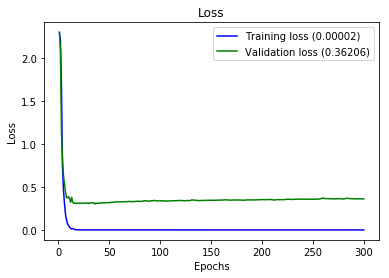

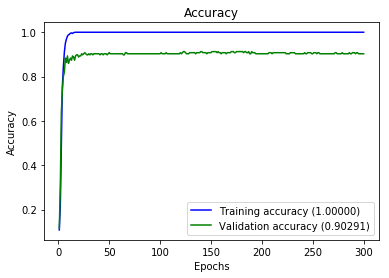

In [20]:
plot_history(history)